<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>

<div class="note-box">
    <h2>2. The Decision Tree Algorithm</h2>
    <p>
        In the previous chapter, we built a tree manually. Now, we will let the machine build it for us.
    </p>
    <p>
        The <strong>Decision Tree Classifier</strong> asks a series of questions to split data into distinct groups. But how does it know <em>which</em> question to ask?
    </p>
    <ul>
        <li>Should we split by Petal Length?</li>
        <li>Should we split by Sepal Width?</li>
        <li>What is the cutoff number?</li>
    </ul>
    <p>
        To answer this, the tree uses a mathematical metric called <strong>Impurity</strong>. It tries to make every child node "purer" than its parent.
    </p>
</div>

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>The Math of Splitting: Gini & Entropy</h2>
    <p>
        When you run the model later, you will see a score called <span class="code-inline">gini</span> in every box. This is the <strong>Gini Impurity</strong>.
    </p>
    <p>
        <strong>Gini Impurity</strong> measures how "mixed" a group of data is.
    </p>
    <ul>
        <li><strong>Gini = 0.0:</strong> Perfect purity. All flowers in this node are the same type. (The goal!)</li>
        <li><strong>Gini = 0.5:</strong> Maximum impurity (for 2 classes). A perfect 50/50 mix.</li>
    </ul>
    <p>
        <strong>The Algorithm Loop:</strong>
        <br>1. Check every possible split (e.g., "Petal Length < 2.4").
        <br>2. Calculate the Gini Impurity for the resulting groups.
        <br>3. Pick the split that reduces impurity the most (Information Gain).
    </p>
</div>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 105
Testing samples: 45


<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>Training the Model</h2>
    <p>
        We are now initializing the <span class="code-inline">DecisionTreeClassifier</span>.
    </p>
    <p>
        <strong>Key Parameters:</strong>
    </p>
    <ul>
        <li><span class="code-inline">criterion='gini'</span>: The math we discussed above. You can also change this to <span class="code-inline">'entropy'</span>.</li>
        <li><span class="code-inline">max_depth</span>: How deep the tree can grow. If we don't limit this, the tree might memorize the data (Overfitting). We will leave it unlimited for now to see the full structure.</li>
    </ul>
</div>

In [2]:
# Initialize the model using Gini Impurity
model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>Evaluation & Confusion Matrix</h2>
    <p>
        The <strong>Confusion Matrix</strong> is a table that shows us where the model got confused.
    </p>
    <ul>
        <li><strong>Diagonal Line:</strong> Correct predictions.</li>
        <li><strong>Off-Diagonal:</strong> Mistakes (e.g., predicting Versicolor when it was actually Virginica).</li>
    </ul>
        <p>
        Because Decision Trees effectively draw boxes around data regions, they are usually very accurate on simple datasets like Iris.
    </p>
</div>

Accuracy: 100.00%


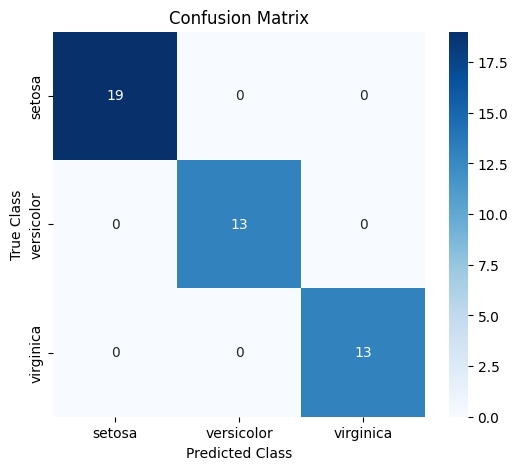

In [3]:
# Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>Visualizing the "Brain" of the Model</h2>
    <p>
        This is the superpower of Decision Trees: <strong>Interpretability</strong>. Unlike Neural Networks, we can see exactly why a decision was made.
    </p>
    <p>
        <strong>How to read the plot below:</strong>
    </p>
    <ul>
        <li><strong>Top Line (e.g., X[2] <= 2.45):</strong> The question being asked. If TRUE, go left. If FALSE, go right.</li>
        <li><strong>gini:</strong> The impurity score (0.0 is pure).</li>
        <li><strong>samples:</strong> How many flowers reached this specific node.</li>
        <li><strong>value:</strong> The count of each class in this node. e.g., <span class="code-inline">[50, 0, 0]</span> means 50 Setosa, 0 Versicolor, 0 Virginica.</li>
    </ul>
</div>

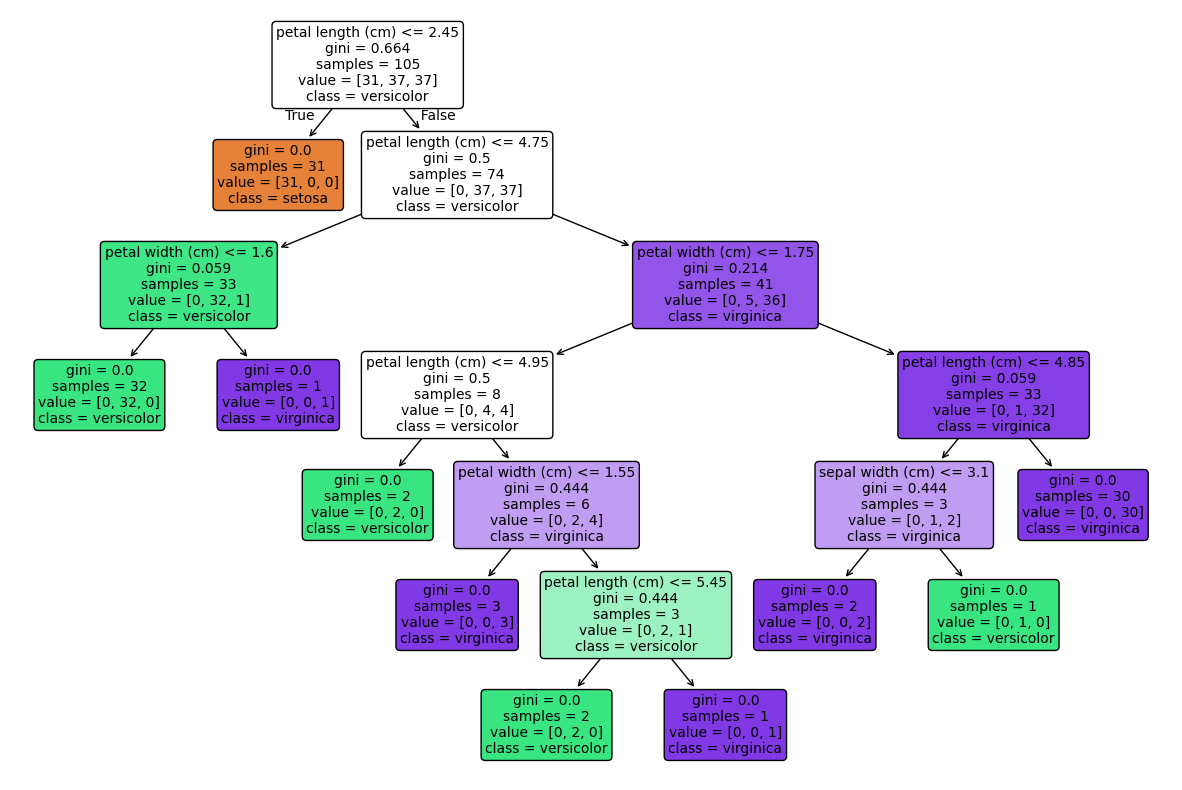

In [4]:
plt.figure(figsize=(15, 10))
tree.plot_tree(model, 
               feature_names=iris.feature_names,  
               class_names=iris.target_names,
               filled=True, 
               rounded=True, 
               fontsize=10)
plt.show()

<style>
    /* Main container style */
    .note-box {
        background-color: #1e1e2e;
        color: #cdd6f4;
        border-left: 6px solid #89b4fa;
        border-radius: 8px;
        padding: 20px;
        margin: 20px 0;
        font-family: system-ui, -apple-system, sans-serif;
        line-height: 1.6;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.2);
        box-sizing: border-box;
        max-width: 100%;
        overflow-wrap: break-word;
    }
    .note-box h2 {
        color: #89b4fa;
        margin-top: 0;
        margin-bottom: 15px;
        font-size: 1.6rem;
        font-weight: 600;
        border-bottom: 1px solid #45475a;
        padding-bottom: 10px;
    }
    .note-box strong { color: #f9e2af; font-weight: 600; }
    .note-box .code-inline {
        background-color: #313244;
        color: #f38ba8;
        padding: 2px 6px;
        border-radius: 4px;
        font-family: 'Menlo', 'Consolas', monospace;
        font-size: 0.9em;
        border: 1px solid #45475a;
    }
    .note-box ul { padding-left: 20px; margin: 10px 0; }
    .note-box li { margin-bottom: 8px; }
</style>
<div class="note-box">
    <h2>A Critical Flaw: Overfitting</h2>
    <p>
        Look at the bottom nodes of the tree above. Do you see nodes that split purely to capture just <strong>1 or 2 distinct samples</strong>?
    </p>
    <p>
        This is called <strong>Overfitting</strong>. The tree has "memorized" the training data so specifically that it might fail on new, unseen data.
    </p>
    <p>
        <strong>How do we fix this?</strong>
    </p>
    <ul>
        <li><strong>Pruning:</strong> Limiting the <span class="code-inline">max_depth</span>.</li>
        <li><strong>Ensemble Methods:</strong> Using many trees together to vote on the answer. This leads us to our next chapter: <strong>Random Forests</strong>.</li>
    </ul>
</div>